# 비지도 학습 
## 군집화(Clustering)

In [1]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
import scipy as sp  # Scipy Package 
from scipy import stats  # Scipy Package 

from sklearn import datasets # sklearn dataset 
from sklearn.model_selection import train_test_split #데이터셋 분리 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 계층적 군집화 
### 덴드로 그램 : from scipy.cluster.hierarchy
- linkage :계층적 군집 구성 함수
- dendrogram : 계층적 시각화 

### 병합 군집화 : from sklearn.cluster import AgglomerativeClustering

In [2]:
## 데이터 셋 생성
# make_blobs() clustering을 할 수 있는 가상의 데이터셋 생성:등방성 가우시안 정규분포를 이용
from sklearn.datasets import make_blobs

# centers=4(군집 수 : 4)
h_X, h_cluster_y = make_blobs(n_samples=40, centers=4, n_features=2, random_state=11)

df_h_c = pd.DataFrame(h_X)
df_h_c.columns = ["x_0", "x_1"]

print(df_h_c.shape)
print(h_cluster_y)

(40, 2)
[3 3 0 0 0 0 1 3 1 3 0 3 0 1 0 2 0 2 2 2 1 3 3 1 2 1 2 2 1 3 2 3 1 1 0 0 2
 1 2 3]


In [3]:
# df_h_c = pd.DataFrame(h_X).reset_index(drop=True)
# df_h_c.columns = ["x_0", "x_1"]


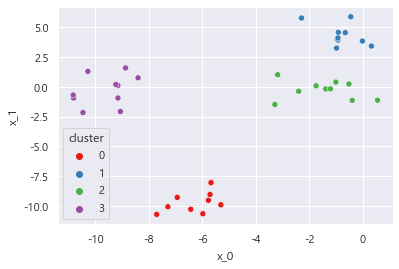

In [4]:
## 시각화 
# 생성 데이터 군집 확인 
df_h_c_temp = df_h_c.copy()
df_h_c_temp['cluster'] = h_cluster_y

sns.scatterplot(x="x_0", y="x_1", hue = 'cluster', data=df_h_c_temp, palette="Set1");

### from scipy.cluster.hierarchy import  linkage
### linkage() 계층적 군집 함수 
### method 
- 'average' : 비가중 평균 거리(UPGMA)
- 'centroid' : 중심 거리(UPGMC)로, 유클리드 거리에만 적합함
- 'complete' : 최장 거리
- 'median' : 가중 질량 중심 거리(WPGMC)로, 유클리드 거리에만 적합함
- 'single' : 최단 거리
- 'ward' : 내부 제곱 거리(최소 분산 알고리즘)로, 유클리드 거리에만 적합함
- 'weighted': 가중 평균 거리(WPGMA)

Text(0, 0.5, 'cluster distance')

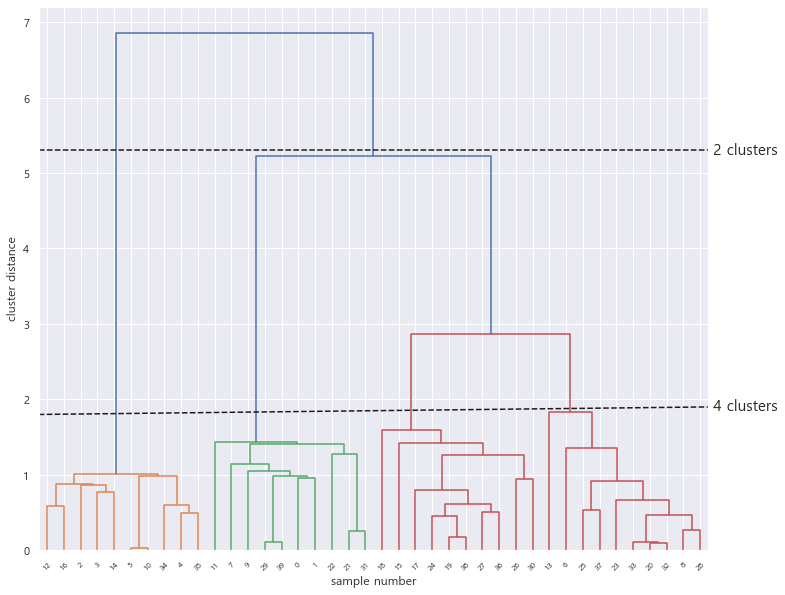

In [5]:
# SciPy에서 linkage 군집 함수와 덴드로그램 함수 
from scipy.cluster.hierarchy import linkage, dendrogram 

# 거리 정보가 담긴 배열을 리턴합
linkage_array = linkage(h_X, method = 'single', metric = 'euclidean' )  # ward 등 사용 해서 차이 확인 

# 덴드로 그램 생성 : 클러스터 간의 거리 정보가 담긴 linkage_array를 사용 
plt.figure(figsize=(12,10))
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [5.3, 5.3], '--', c='k')
ax.plot(bounds, [1.8, 1.9], '--', c='k')

ax.text(bounds[1], 5.3, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 1.9, ' 4 clusters', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")

### from sklearn.cluster import AgglomerativeClustering
- n_clustersint : 클러스터 수, default=2
- linkage :‘ward, 'complete', 'average',‘single, default=’ward’

In [6]:
## 계층적 군집화 
## AgglomerativeClustering() 함수 이용 
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=4, linkage = 'single')
agg_cluster.fit(df_h_c)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [7]:
# cluster 결과 
agg_cluster.labels_

array([2, 2, 3, 3, 3, 3, 0, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 1, 1, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 1, 2], dtype=int64)

,x_0,x_1,cluster
0,-8.865270,1.593797,2
1,-8.399006,0.763374,2
2,-6.931236,-9.295093,3


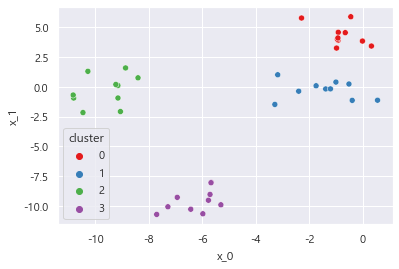

In [8]:
# 결과 확인
result_h_c = df_h_c.copy()
result_h_c["cluster"] = agg_cluster.labels_
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=result_h_c, palette="Set1");
result_h_c.head(3)

In [9]:
## 군집 성능 평가 
# 조정 랜드 지수 
from sklearn.metrics.cluster import adjusted_rand_score

# h_cluster_y : 최초 데이터 생성 시 군집 값 
print(adjusted_rand_score(result_h_c['cluster'], h_cluster_y))

1.0


## 비계층적 군집화 
## K-Means 

In [10]:
## 데이터 셋 생성 
# make_blobs() clustering을 할 수 있는 가상의 데이터셋 생성 :등방성 가우시안 정규분포를 이용
K_X, k_cluster_y = make_blobs(n_samples=100, centers=5, n_features=2, random_state=11)

df_k = pd.DataFrame(K_X).reset_index(drop=True)
df_k.columns = ["x_0", "x_1"]
print(df_k.shape)
df_k.head()

(100, 2)


,x_0,x_1
0,-6.098259,-8.207724
1,8.459303,7.935884
2,7.464359,6.987583
3,-9.234356,0.086146
4,-5.973556,-10.676098


In [11]:
k_cluster_y

array([0, 4, 4, 3, 0, 2, 1, 2, 2, 1, 4, 3, 0, 3, 1, 1, 0, 1, 3, 0, 4, 2,
       4, 0, 0, 4, 4, 1, 4, 1, 0, 3, 4, 2, 1, 2, 0, 2, 3, 2, 1, 1, 0, 4,
       3, 3, 3, 3, 4, 2, 3, 2, 0, 1, 2, 3, 2, 4, 1, 3, 4, 1, 0, 1, 3, 2,
       0, 4, 3, 1, 2, 0, 4, 1, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 1, 0, 4, 4,
       4, 4, 3, 2, 2, 1, 2, 1, 3, 2, 4, 0])

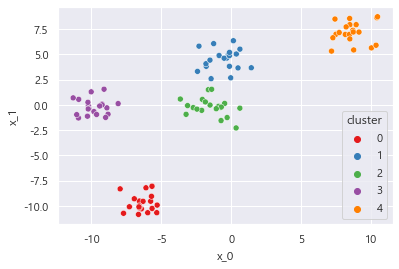

In [12]:
# 데이터 셋 시각화 
# 생성 데이터 군집 확인 
df_k_temp = df_k.copy()
df_k_temp['cluster'] = k_cluster_y

sns.scatterplot(x="x_0", y="x_1", data=df_k_temp, hue='cluster', palette="Set1");

## scikit-learn의 from sklearn.cluster import KMeans
### cluster 서브패키지는 K-평균 군집화를 위한 KMeans 클래스 
#### 파라미터
- n_clusters: 군집의 갯수, default=8
- init: 초기화 방법. "random", "k-means++"이면 K-평균++ 방법. default=’k-means++
- n_init: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택.
- max_iter: 최대 반복 횟수.
- random_state: 시드값.

#### 속성 
- cluster_centers_ : 군집의 중심점 
- labels_ : 데이터의 군집 
- inertia_ : 군집의 중심 위치와 각 데이터 까지의 합 

cluster중심점: 
 [[-1.62456747  3.81376395]
 [-6.33461035 -9.66567935]
 [ 9.68607563  5.65654895]
 [-9.82147875 -0.1970776 ]
 [-0.04913531  4.8640659 ]
 [-0.45256142 -0.69749968]
 [ 8.42781243  7.43140564]
 [-2.34729527  0.19754152]]
cluster결과: 
 [1 6 6 3 1 7 0 7 7 4 6 3 1 3 4 4 1 4 3 1 6 5 2 1 1 2 6 4 6 4 1 3 6 5 4 7 1
 5 3 5 4 4 1 6 3 3 3 3 6 7 3 7 1 0 5 3 7 6 4 3 6 0 1 0 3 5 1 2 3 0 5 1 6 4
 4 1 3 5 3 1 7 1 3 1 0 1 6 6 6 6 3 7 7 4 5 0 3 7 6 1]
cluster관성: 
 125.99066713808352


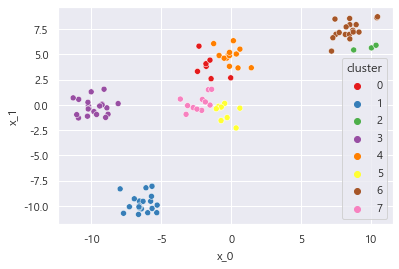

In [13]:
## k means 내용 확인 
from sklearn.cluster import KMeans

k_model = KMeans() # n_cluster = default :8
k_model.fit(df_k)

print("cluster중심점: \n", k_model.cluster_centers_)
print("cluster결과: \n", k_model.labels_)
print("cluster관성: \n", k_model.inertia_)

# 시각화 결과 확인
result_df_k = df_k.copy()
result_df_k["cluster"] = k_model.labels_

sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=result_df_k, palette="Set1");
# result_df_k.head()

### k 군집 갯수 최적화

C:\Users\bigdata\anaconda3\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


k =  1 7364.489330907612
k =  2 2986.857551244743
k =  3 1423.2889985386253
k =  4 405.1622954106642
k =  5 176.10900958366818
k =  6 154.37298981664293
k =  7 137.79422635709713
k =  8 125.4839923509949
k =  9 111.92087745536178


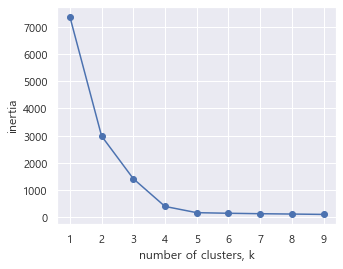

In [14]:
## 적절한 군집수 찾기 - Elbow 
# Inertia(군집 내 거리제곱합의 합), value (적정 군집수)

ks = range(1,10)
inertias = [] # 관성 

for k in ks:
    k_model_e = KMeans(n_clusters=k)
    k_model_e.fit(df_k)
    inertias.append(k_model_e.inertia_)
    print("k = ",k, k_model_e.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(5, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

0.48043916238728535
0.6014286995268198
0.7425913262892442
0.7411872633394028
0.6923198169408328
0.657742047265785
0.5664110829151103
0.588130751842934


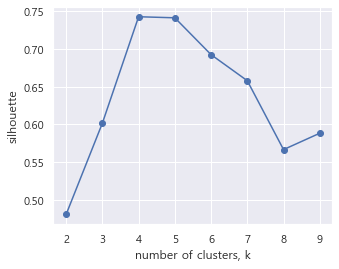

In [15]:
## 적절한 군집수 찾기 - 실루엣 계수 
from sklearn.metrics import silhouette_samples

ks = range(2,10)
silhouette_score = []

for k in ks :
    k_model_s = KMeans(n_clusters=k)
    k_pred_s = k_model_s.fit_predict(df_k)
    silhouette_t = np.mean(silhouette_samples(df_k, k_pred_s, metric = 'euclidean'))
    print(silhouette_t)
    silhouette_score.append(silhouette_t)

plt.figure(figsize=(5, 4))
plt.plot(range(2,10), silhouette_score, marker='o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.show()

cluster중심점: 
 [[-6.33461035 -9.66567935]
 [-1.0476008   2.1456166 ]
 [-9.82147875 -0.1970776 ]
 [ 8.61655191  7.16517714]]
cluster결과: 
 [0 3 3 2 0 1 1 1 1 1 3 2 0 2 1 1 0 1 2 0 3 1 3 0 0 3 3 1 3 1 0 2 3 1 1 1 0
 1 2 1 1 1 0 3 2 2 2 2 3 1 2 1 0 1 1 2 1 3 1 2 3 1 0 1 2 1 0 3 2 1 1 0 3 1
 1 0 2 1 2 0 1 0 2 0 1 0 3 3 3 3 2 1 1 1 1 1 2 1 3 0]
cluster관성: 
 405.1622954106642


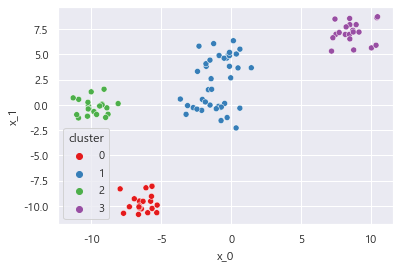

In [16]:
# k-means clustering 실행, k = 4 반영  
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df_k)

# 결과 확인
print("cluster중심점: \n", kmeans_4.cluster_centers_)
print("cluster결과: \n", kmeans_4.labels_)
print("cluster관성: \n", kmeans_4.inertia_)

# 시각화 
result_df_k_4 = df_k.copy()
result_df_k_4["cluster"] = kmeans_4.labels_
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=result_df_k_4, palette="Set1");
# result_df_k_4.head()

cluster중심점: 
 [[ 8.61655191  7.16517714]
 [-1.49466504 -0.20522702]
 [-6.33461035 -9.66567935]
 [-9.82147875 -0.1970776 ]
 [-0.60053657  4.49646022]]
cluster결과: 
 [2 0 0 3 2 1 4 1 1 4 0 3 2 3 4 4 2 4 3 2 0 1 0 2 2 0 0 4 0 4 2 3 0 1 4 1 2
 1 3 1 4 4 2 0 3 3 3 3 0 1 3 1 2 4 1 3 1 0 4 3 0 4 2 4 3 1 2 0 3 4 1 2 0 4
 4 2 3 1 3 2 1 2 3 2 4 2 0 0 0 0 3 1 1 4 1 4 3 1 0 2]
cluster관성: 
 176.10900958366818


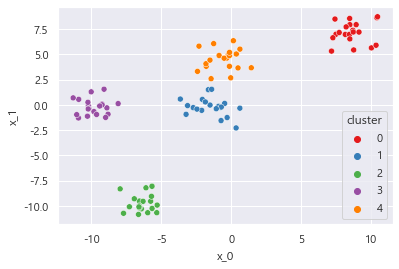

In [17]:
# k-means clustering 실행, k = 5 반영  
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(df_k)

# 결과 확인
print("cluster중심점: \n", kmeans_5.cluster_centers_)
print("cluster결과: \n", kmeans_5.labels_)
print("cluster관성: \n", kmeans_5.inertia_)

# 시각화
result_df_k_5 = df_k.copy()
result_df_k_5["cluster"] = kmeans_5.labels_
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=result_df_k_5, palette="Set1");
# result_df_k_5.head()

### K-Means 직접 계산 

In [18]:
## 이미 만들어 놓은 데이터 셋 
# K_X, k_cluster_y
print("데이터 셋:\n",df_k.head())
print()

# 중심점 산출 : 랜덤한 k(5)개의 데이터를 중심점으로 사용
centroids = df_k.sample(5, random_state=20)
print("시작(중심점):\n", centroids)

데이터 셋:
         x_0        x_1
0 -6.098259  -8.207724
1  8.459303   7.935884
2  7.464359   6.987583
3 -9.234356   0.086146
4 -5.973556 -10.676098

시작(중심점):
           x_0       x_1
70  -0.721655 -0.219806
74  -0.135527  5.194246
2    7.464359  6.987583
44 -10.168813 -0.385478
56  -3.128070 -0.072589


#### 1) 첫번째 군집화 

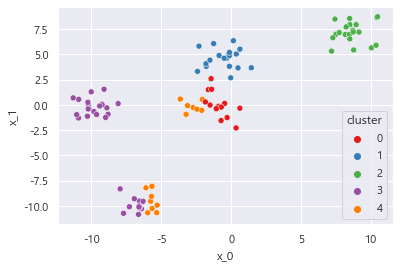

In [19]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(df_k, centroids, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
dir_result1 = df_k.copy()
dir_result1["cluster"] = np.array(cluster_num)
# print(dir_result1.head())

# 시각화 
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=dir_result1, palette="Set1");

In [20]:
distance[:5]

array([[ 9.6288476 , 14.66857068, 20.36767021,  8.8179897 ,  8.66039466],
       [12.28028012,  9.02151295,  1.37447729, 20.40224897, 14.08555573],
       [10.90675457,  7.80860676,  0.        , 19.11258179, 12.72971368],
       [ 8.51819683, 10.43462305, 18.06867239,  1.04672759,  6.10834811],
       [11.70113261, 16.9100677 , 22.19421554, 11.11292264, 10.9786694 ]])

#### 2) 두번째 군집화 

In [21]:
#  두번째 시작점 : 현재 기준 cluster별로 묶어서 평균 계산
centroids_2 = dir_result1.groupby("cluster").mean()
centroids_2

,x_0,x_1
cluster,,
0,-0.854228,-0.027004
1,-0.555871,4.596780
2,8.616552,7.165177
3,-8.773082,-3.640079
4,-4.408721,-5.346799


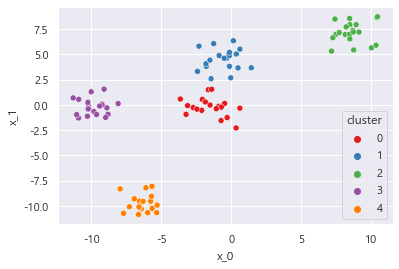

In [22]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(df_k, centroids_2, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
dir_result2 = df_k.copy()
dir_result2["cluster"] = np.array(cluster_num)
# print(dir_result2.head())

# 시각화 
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=dir_result2, palette="Set1");

In [23]:
distance[:5]

array([[ 9.71720341, 13.95254055, 21.28031378,  5.29320845,  3.32256395],
       [12.25354872,  9.61368705,  0.78658549, 20.75952851, 18.49366723],
       [10.88132964,  8.36899226,  1.16579895, 19.40622859, 17.1203689 ],
       [ 8.38089136,  9.78069113, 19.20332218,  3.75466756,  7.26661101],
       [11.81569803, 16.20531113, 23.04739331,  7.57251015,  5.55429004]])

#### 3) 세번째 군집화 

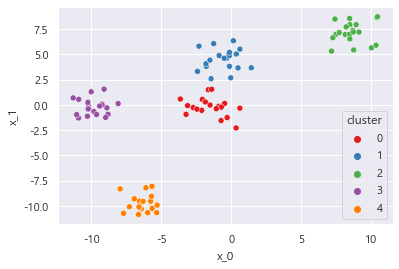

In [24]:
# 세번째 시작점 : 현재 기준 cluster별로 묶어서 평균 계산
centroids_3 = dir_result2.groupby("cluster").mean()
centroids_3

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(df_k, centroids_3, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
dir_result3 = df_k.copy()
dir_result3["cluster"] = np.array(cluster_num)
# print(dir_result3.head())

# 시각화 
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=dir_result3, palette="Set1");

#### 4) 네번째 군집화  

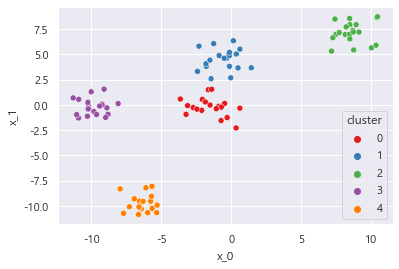

In [25]:
# 네번째 시작점 : 현재 기준 cluster별로 묶어서 평균 계산
centroids_4 = dir_result3.groupby("cluster").mean()
centroids_4

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(df_k, centroids_4, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
dir_result4 = df_k.copy()
dir_result4["cluster"] = np.array(cluster_num)
# print(dir_result4.head())

# 시각화 
sns.scatterplot(x="x_0", y="x_1", hue="cluster", data=dir_result4, palette="Set1");

## 군집 평가 
#### 정답을 아는 군집 평가 : 조정 랜드 지수 
- from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
## 일치 행렬 
# 초기 군집 혹은 최초 군집 

first_cluster = np.array([[1, 1, 1, 0, 0], [1, 1, 1, 0, 0],
                          [1, 1, 1, 0, 0], [0, 0, 0, 1, 1],
                          [0, 0, 0, 1, 1],
])
# 군집 결과  
clustering = np.array([[1, 1, 0, 0, 0], [1, 1, 0, 0, 0],
                       [0, 0, 1, 1, 1], [0, 0, 1, 1, 1],
                       [0, 0, 1, 1, 1],
])

# 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산
incidence = 1 * (first_cluster == clustering)   

# 일치행렬(대각 행렬)
incidence

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

In [27]:
## 일치 행렬의 1의 값 
np.fill_diagonal(incidence, 0) # 대각성분 제외
a_plus_b = np.sum(incidence) / 2 # 대칭행렬이므로 나누기 2
a_plus_b

6.0

In [28]:
## 랜드 지수 
from scipy.special import comb
rand_index = a_plus_b / comb(incidence.shape[0], 2)
rand_index

0.6

In [29]:
## 조정 랜드 지수 
from sklearn.metrics.cluster import adjusted_rand_score

## 직접 계산한 k 군집 모델 평가 
# k_cluster_y : 최초 데이터 생성 시 군집 값 
print(adjusted_rand_score(dir_result1['cluster'], k_cluster_y))
print(adjusted_rand_score(dir_result2['cluster'], k_cluster_y))
print(adjusted_rand_score(dir_result3['cluster'], k_cluster_y))
print(adjusted_rand_score(dir_result4['cluster'], k_cluster_y))

0.6821819753729967
1.0
1.0
1.0


### 정답을 모르는 군집 평가 
### 실루엣 계수 

In [30]:
## 실루엣 계수 
from sklearn.metrics import silhouette_samples

print(np.mean(silhouette_samples(df_k, dir_result1['cluster'], metric = 'euclidean')))
print(np.mean(silhouette_samples(df_k, dir_result2['cluster'], metric = 'euclidean')))
print(np.mean(silhouette_samples(df_k, dir_result3['cluster'], metric = 'euclidean')))
print(np.mean(silhouette_samples(df_k, dir_result4['cluster'], metric = 'euclidean')))

0.40819392036786584
0.7411872633394028
0.7411872633394028
0.7411872633394028


# DBSCAN(density-based spatial clustering of applications with noise) 
## from sklearn.cluster import DBSCAN
- eps : default=0.5
- min_samples : default=5

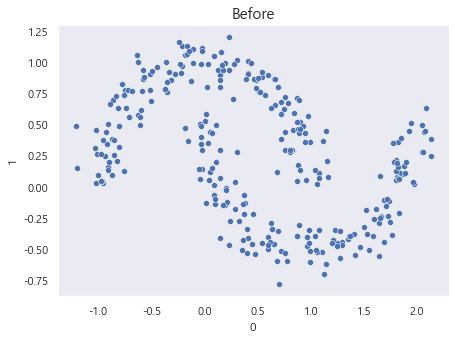

In [31]:
import pandas as pd
from sklearn.datasets import make_moons

# 데이터 셋 생성 X: 2차원, y : cluster
X,y = make_moons(n_samples=300, noise=0.1, random_state=21)

df_scan = pd.DataFrame(X)

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=0, y=1, data=df_scan, palette="Set1");
plt.grid()
plt.show()

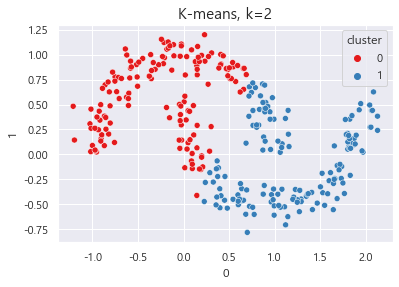

In [32]:
# k-means clustering 실행, k = 2 반영  

c_kmeans = KMeans(n_clusters=2, init = 'k-means++')
c_kmeans.fit(df_scan)

# 결과 확인
result_c_kmeans = df_scan.copy()
result_c_kmeans["cluster"] = c_kmeans.labels_
plt.title("K-means, k=2", fontsize=15)
sns.scatterplot(x=0, y=1, hue="cluster", data=result_c_kmeans, palette="Set1");
# result_c_kmeans.head()

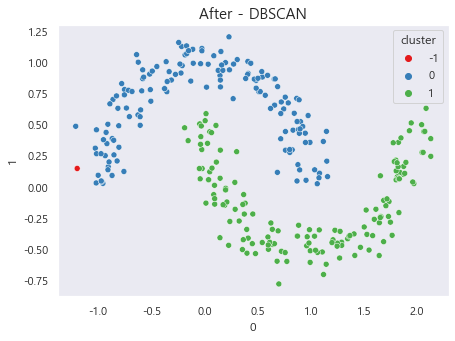

In [33]:
# DBSCAN 
from sklearn.cluster import DBSCAN

# e = 0.3, min_samples =5
db_scan = DBSCAN(eps=0.2, min_samples=5)
db_scan.fit(df_scan)

result_df_c = df_scan.copy() 
result_df_c['cluster'] = db_scan.labels_

# 시각화 
plt.figure(figsize=(7,5))
plt.title("After - DBSCAN", fontsize=15)
sns.scatterplot(x=0, y=1, hue="cluster", data=result_df_c, palette="Set1");
plt.grid()
plt.show()

In [34]:
## DBSCAN 성능 평가 
from sklearn import metrics

# 실루엣 계수
print("실룻엣 계수(원 데이터): ",np.mean(silhouette_samples(df_scan, y, metric = 'euclidean')))
print("실룻엣 계수(k-means): ",np.mean(silhouette_samples(df_scan, result_c_kmeans['cluster'], metric = 'euclidean')))
print("실룻엣 계수(DBSCAN): ",np.mean(silhouette_samples(df_scan, result_df_c['cluster'], metric = 'euclidean')))

# dbscan 랜드 지수 
print("조정랜드지수(k-means): ", adjusted_rand_score(y, result_c_kmeans['cluster']))
print("조정랜드지수(DBSCAN): ", adjusted_rand_score(y, result_df_c['cluster']))

labels = db_scan.labels_

# db의 레이블을 사용하여 bool 배열을 생성, outlier는 False로 변경
core_samples_mask = np.zeros_like(db_scan.labels_, dtype=bool)
core_samples_mask[db_scan.core_sample_indices_] = True

# 레이블에 있는 클러스터 수, 노이즈가 있을 경우 무시
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('n_clusters_->', n_clusters_)
print('noise count->', n_noise)
print('Homogeneity-> %0.3f' % metrics.homogeneity_score(y, labels))   # 동질성
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))  # 완전성

실룻엣 계수(원 데이터):  0.3177122709706079
실룻엣 계수(k-means):  0.48577348681629967
실룻엣 계수(DBSCAN):  0.15303001057048182
조정랜드지수(k-means):  0.2542172980060862
조정랜드지수(DBSCAN):  0.9933554078979533
n_clusters_-> 2
noise count-> 1
Homogeneity-> 1.000
Completeness: 0.972
